Scope: Our project is to uncover data trends among all star MLB pitchers from 2016-2021. We will examine relationships between their strikeout %, ERA (earned run average) , BB (walk)%, in their all star seasons, as well as some of their physical dimensions and place of birth (state if domestic, country if foreign born).

In [3]:
import pandas as pd
import requests
import json
from pprint import pprint
import csv
from matplotlib import pyplot as plt

In [5]:
fpath = 'roster_and_stats_merged.csv'
stats_df = pd.read_csv(fpath,index_col=0)
players_df=pd.read_csv('dimensions_dict.csv',index_col=0)

In [6]:
stats_df.head()

,Year,Player Name,Shortname,Age,ERA,ERA+,K%,BB%
0,2019,Shane Bieber,biebesh01,24.0,3.28,147.0,0.302,0.047
1,2019,Aroldis Chapman,chapmar01,31.0,2.21,206.0,0.362,0.106
2,2019,Gerrit Cole,colege01,28.0,2.50,185.0,0.399,0.059
3,2019,Lucas Giolito,giolilu01,24.0,3.41,134.0,0.323,0.081
4,2019,Shane Greene,greensh02,30.0,2.30,207.0,0.254,0.068


In [7]:
stats_df['Player_url'] = stats_df['Player Name'].replace(' ','%25',regex=True)
stats_df

,Year,Player Name,Shortname,Age,ERA,ERA+,K%,BB%,Player_url
0,2019,Shane Bieber,biebesh01,24.0,3.28,147.0,0.302,0.047,Shane%25Bieber
1,2019,Aroldis Chapman,chapmar01,31.0,2.21,206.0,0.362,0.106,Aroldis%25Chapman
2,2019,Gerrit Cole,colege01,28.0,2.50,185.0,0.399,0.059,Gerrit%25Cole
3,2019,Lucas Giolito,giolilu01,24.0,3.41,134.0,0.323,0.081,Lucas%25Giolito
4,2019,Shane Greene,greensh02,30.0,2.30,207.0,0.254,0.068,Shane%25Greene
...,...,...,...,...,...,...,...,...,...
147,2015,Darren O'Day,odayda01,32.0,1.52,272.0,0.319,0.055,Darren%25O'Day
148,2015,Glen Perkins,perkigl01,32.0,3.32,123.0,0.227,0.042,Glen%25Perkins
149,2015,David Price,priceda01,29.0,2.45,164.0,0.253,0.053,David%25Price
150,2015,Chris Sale,salech01,26.0,3.41,114.0,0.321,0.049,Chris%25Sale


## Don't need to run this again. has been exported to dimensions_dict.csv file.

In [6]:
base_url = "http://lookup-service-prod.mlb.com/json/named.search_player_all.bam?sport_code='mlb'&active_sw='Y'&name_part="
players = stats_df['Player_url']
players_dict = []
for player in players:
    url=f"{base_url}'{player}'"
    response = requests.get(url).json()
    players_dict.append(response)
    

In [7]:
players_dict[125]['search_player_all']['queryResults']

{'created': '2021-08-07T18:11:49', 'totalSize': '0'}

In [8]:
cleaned_players_dict = []
count = 0
for player in players_dict:
    try:
        cleaned_players_dict.append(players_dict[count]['search_player_all']['queryResults']['row'])
    except:
        print(f'{count} has no data')
    count += 1
cleaned_players_dict

13 has no data
125 has no data
126 has no data
134 has no data
148 has no data


[{'position': 'P',
  'birth_country': 'USA',
  'weight': '200',
  'birth_state': 'CA',
  'name_display_first_last': 'Shane Bieber',
  'college': 'UC Santa Barbara',
  'height_inches': '3',
  'name_display_roster': 'Bieber',
  'sport_code': 'mlb',
  'bats': 'R',
  'name_first': 'Shane',
  'team_code': 'cle',
  'birth_city': 'Orange',
  'height_feet': '6',
  'pro_debut_date': '2018-05-31T00:00:00',
  'team_full': 'Cleveland Indians',
  'team_abbrev': 'CLE',
  'birth_date': '1995-05-31T00:00:00',
  'throws': 'R',
  'league': 'AL',
  'name_display_last_first': 'Bieber, Shane',
  'position_id': '1',
  'high_school': 'Laguna Hills, CA',
  'name_use': 'Shane',
  'player_id': '669456',
  'name_last': 'Bieber',
  'team_id': '114',
  'service_years': '',
  'active_sw': 'Y'},
 {'position': 'P',
  'birth_country': 'Cuba',
  'weight': '218',
  'birth_state': '',
  'name_display_first_last': 'Aroldis Chapman',
  'college': '',
  'height_inches': '4',
  'name_display_roster': 'Chapman, A',
  'sport_c

In [9]:
new_cleaned_players_list = [x for x in cleaned_players_dict if len(x)==29]
players_df = pd.DataFrame.from_records(new_cleaned_players_list)
players_df.to_csv('dimensions_dict.csv')

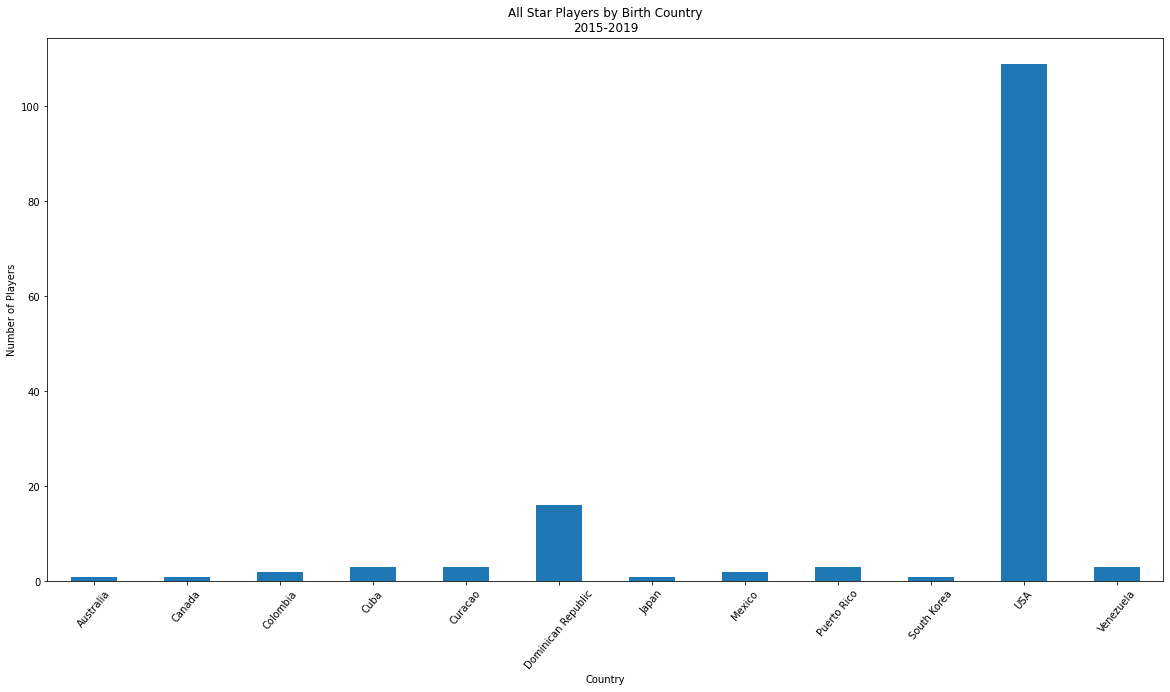

In [8]:
country_grp = players_df.groupby(['birth_country'])['birth_country'].count()
country_grp.plot(kind='bar',title='All Star Players by Birth Country\n2015-2019',
                 xlabel='Country',ylabel='Number of Players',rot=50,figsize=(20,10))
plt.savefig('Charts/as_player_country.png')

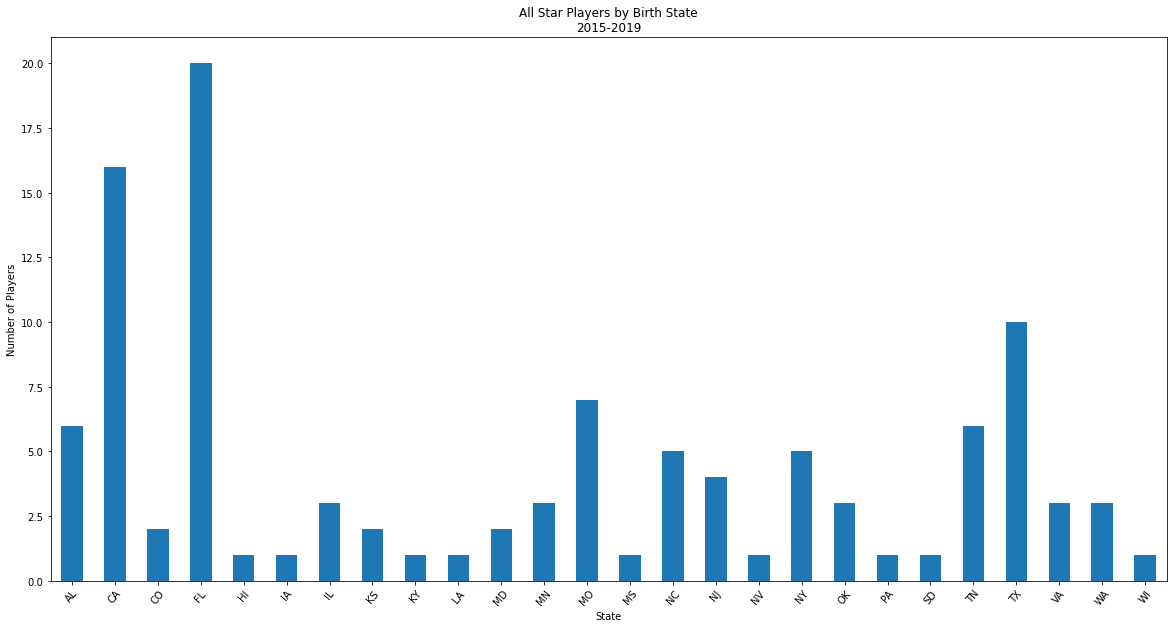

In [9]:
as_us = players_df[players_df['birth_country']=='USA']
state_grp = as_us.groupby(["birth_state"])['birth_state'].count()
state_grp.plot(kind='bar',title='All Star Players by Birth State\n2015-2019',
                 xlabel='State',ylabel='Number of Players',rot=50,figsize=(20,10))
plt.savefig('Charts/as_player_state.png')

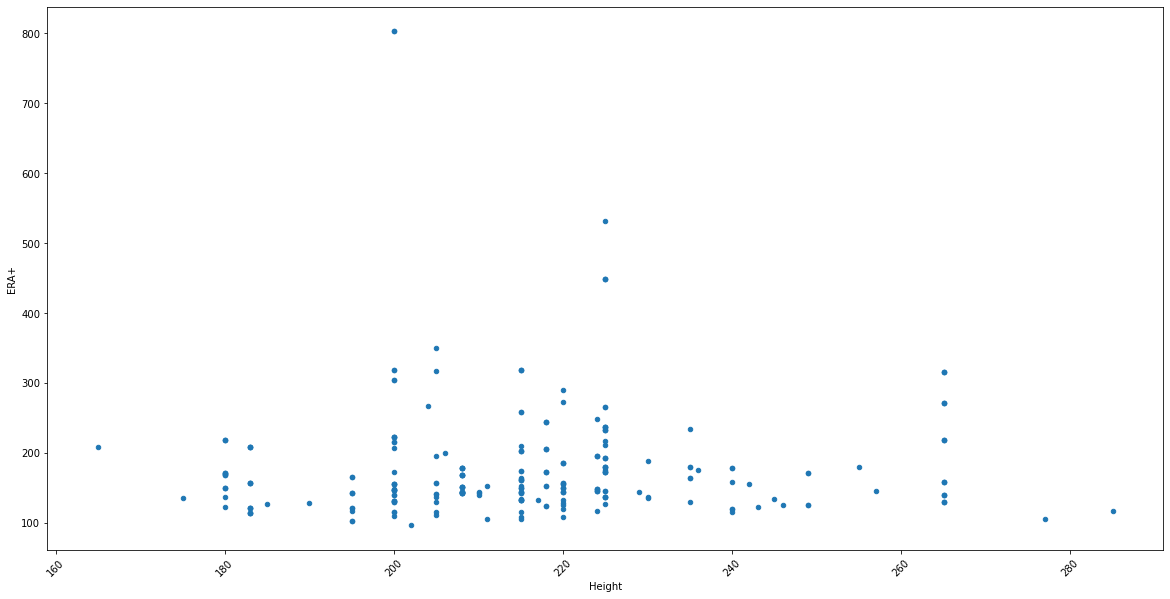

In [10]:
by_weight = pd.merge(players_df,stats_df,how='left',left_on='name_display_first_last',right_on='Player Name')
by_weight.plot('weight','ERA+',kind='scatter',rot=45,figsize=(20,10),xlabel='Height')
plt.savefig('Charts/as_player_weight.png')

In [15]:
by_height = by_weight[['ERA+','height_inches','height_feet']].copy()
by_height.fillna(0)

#ft_in = by_height['height_feet'].astype(int)*12
inches = by_height['height_inches']
height_df = pd.DataFrame({
    'ft':by_height['height_feet'],
    'in':by_height['height_inches']
})
for x in height_df:
    ft = height_df['ft']
    ft_in = ft
    #print(ft_in)
    inch = height_df['in']
    height_df['tot'] = str(f'{ft}ft+{inch}in')
height_df

,ft,in,tot
0,6,3,0 6\n1 6\n2 6\n3 6\n4 ...
1,6,4,0 6\n1 6\n2 6\n3 6\n4 ...
2,6,4,0 6\n1 6\n2 6\n3 6\n4 ...
3,6,4,0 6\n1 6\n2 6\n3 6\n4 ...
4,6,4,0 6\n1 6\n2 6\n3 6\n4 ...
...,...,...,...
280,6,6,0 6\n1 6\n2 6\n3 6\n4 ...
281,6,6,0 6\n1 6\n2 6\n3 6\n4 ...
282,6,6,0 6\n1 6\n2 6\n3 6\n4 ...
283,6,6,0 6\n1 6\n2 6\n3 6\n4 ...


In [62]:
by_height['tot_height'] = (ft+inches)
height_grp = by_height.groupby('tot_height')
height_count = height_grp['tot_height'].count()
height_count.plot(kind='bar',rot=45)
#plt.savefig('Charts/as_player_height.png')
by_height['tot_height'].max()

TypeError: can only concatenate str (not "int") to str